In [10]:
# import the required libraries
import pandas as pd
# import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load the dataset
dataset_url = 'ai4i2020.csv'

df = pd.read_csv(dataset_url)

In [12]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [13]:
df.head(3)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0

In [14]:
df.shape

(10000, 14)

**Data Preparation** 


**Exploratory Data Analysis**

In [15]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [16]:
# rename dataset columns
#so as to easy referencing not [K] 
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [17]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [18]:
# drop UDI and Product ID columns which are of not any use
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [19]:
df.head()

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   
3    L            298.2                308.6              1433    39.5   
4    L            298.2                308.7              1408    40.0   

   Tool wear  Machine failure  TWF  HDF  PWF  OSF  RNF  
0          0                0    0    0    0    0    0  
1          3                0    0    0    0    0    0  
2          5                0    0    0    0    0    0  
3          7                0    0    0    0    0    0  
4          9                0    0    0    0    0    0

In [20]:
df.info() # there are no null values, as it turns out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [21]:
df.isnull().sum() # there are no null values, as it turns out

Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64

In [22]:
#Since No null values we can directly proceed ahead

In [23]:
df.dtypes

Type                    object
Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
Machine failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
dtype: object

In [24]:
#description of the numeric data valued columns here  
df_numeric = df.select_dtypes(include = [np.number])
df_numeric.describe().transpose()

count        mean         std     min     25%     50%  \
Air temperature      10000.0   300.00493    2.000259   295.3   298.3   300.1   
Process temperature  10000.0   310.00556    1.483734   305.7   308.8   310.1   
Rotational speed     10000.0  1538.77610  179.284096  1168.0  1423.0  1503.0   
Torque               10000.0    39.98691    9.968934     3.8    33.2    40.1   
Tool wear            10000.0   107.95100   63.654147     0.0    53.0   108.0   
Machine failure      10000.0     0.03390    0.180981     0.0     0.0     0.0   
TWF                  10000.0     0.00460    0.067671     0.0     0.0     0.0   
HDF                  10000.0     0.01150    0.106625     0.0     0.0     0.0   
PWF                  10000.0     0.00950    0.097009     0.0     0.0     0.0   
OSF                  10000.0     0.00980    0.098514     0.0     0.0     0.0   
RNF                  10000.0     0.00190    0.043550     0.0     0.0     0.0   

                        75%     max  
Air temperature       301.5   304.5  
Process temperature   311.1   313.8  
Rotational speed     1612.0  2886.0  
Torque                 46.8    76.6  
Tool wear             162.0   253.0  
Machine failure         0.0     1.0  
TWF                     0.0     1.0  
HDF                     0.0     1.0  
PWF                     0.0     1.0  
OSF                     0.0     1.0  
RNF                     0.0     1.0

In [25]:
#description of the numeric object valued columns here  i.e categorical valued
# For object (categorical) columns, describe() provides:

#     Count: Number of non-null entries.
#     Unique: Number of unique values in the column.
#     Top: Most frequent value.
#     Freq: Frequency of the most frequent value.
df_categorical = df.select_dtypes(include = [np.object_]) #here object_ and not object
df_categorical.describe().transpose()


count unique top  freq
Type  10000      3   L  6000

Plot the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)


In [26]:
for i , col in enumerate(df.columns):
    print(i, ":" ,col)

0 : Type
1 : Air temperature
2 : Process temperature
3 : Rotational speed
4 : Torque
5 : Tool wear
6 : Machine failure
7 : TWF
8 : HDF
9 : PWF
10 : OSF
11 : RNF


<Axes: xlabel='Type', ylabel='Count'>

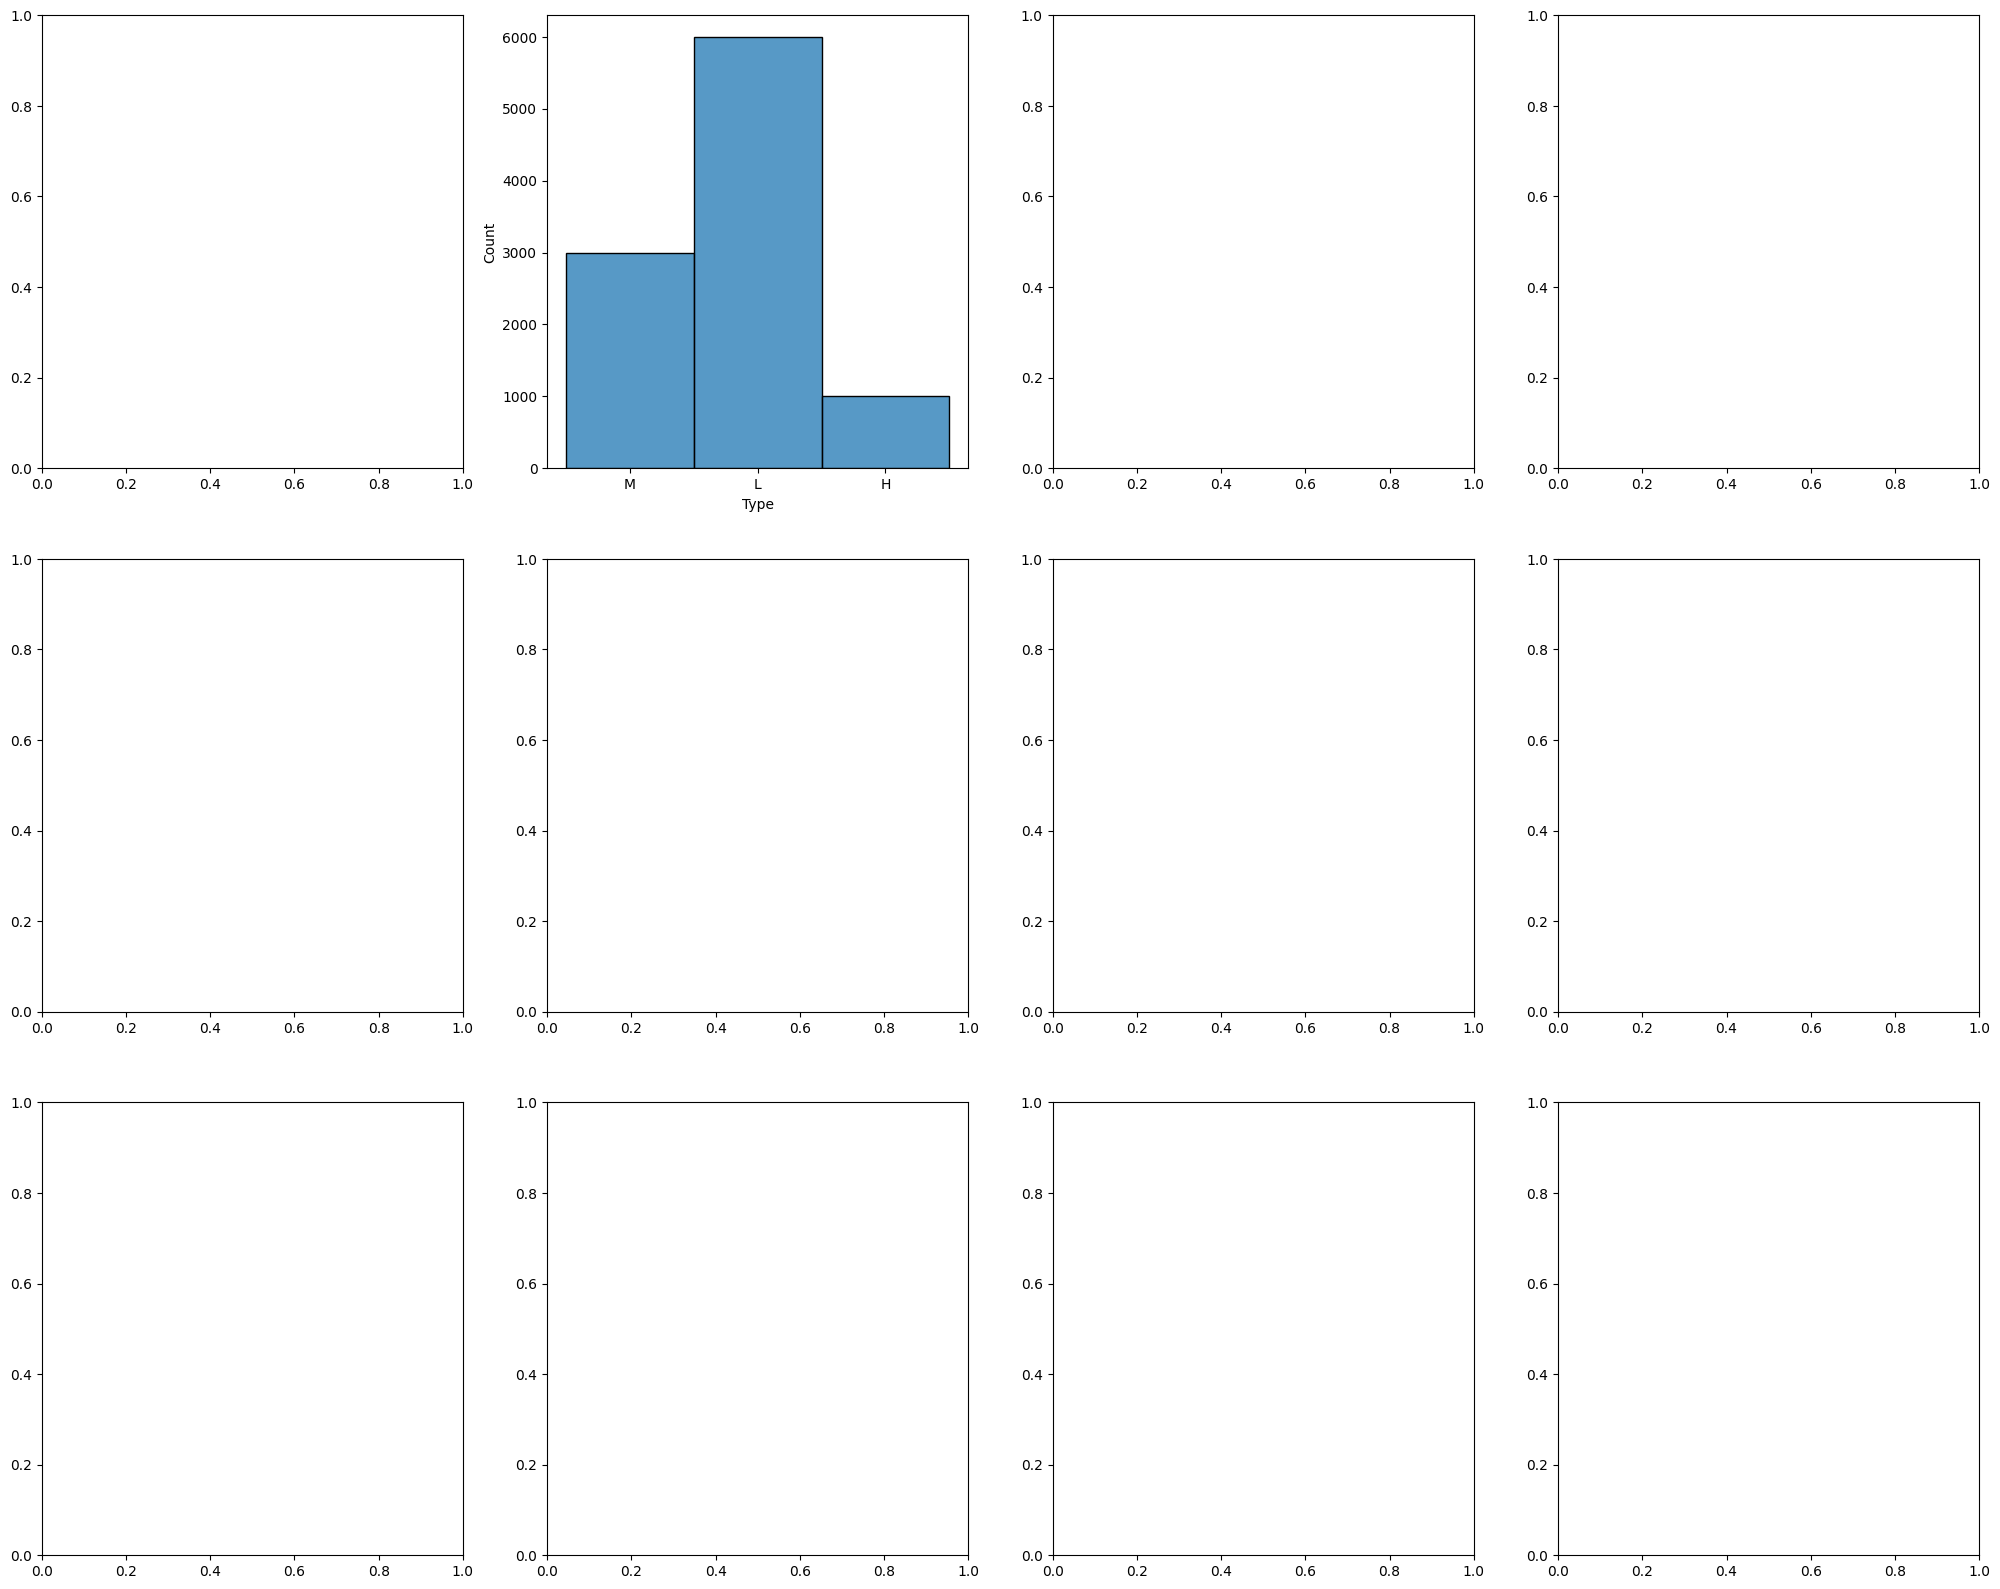

In [27]:
# This creates a grid of subplots with 3 rows and 4 columns, and sets the overall figure size to 25x20 inches.
fig,ax = plt.subplots(3,4,figsize =(25,20))
sns.histplot(df['Type'],ax = ax[0][1])
# for i,col in enumerate(df.columns):
#     sns.histplot(df[col],ax = ax[i//4][i %4])


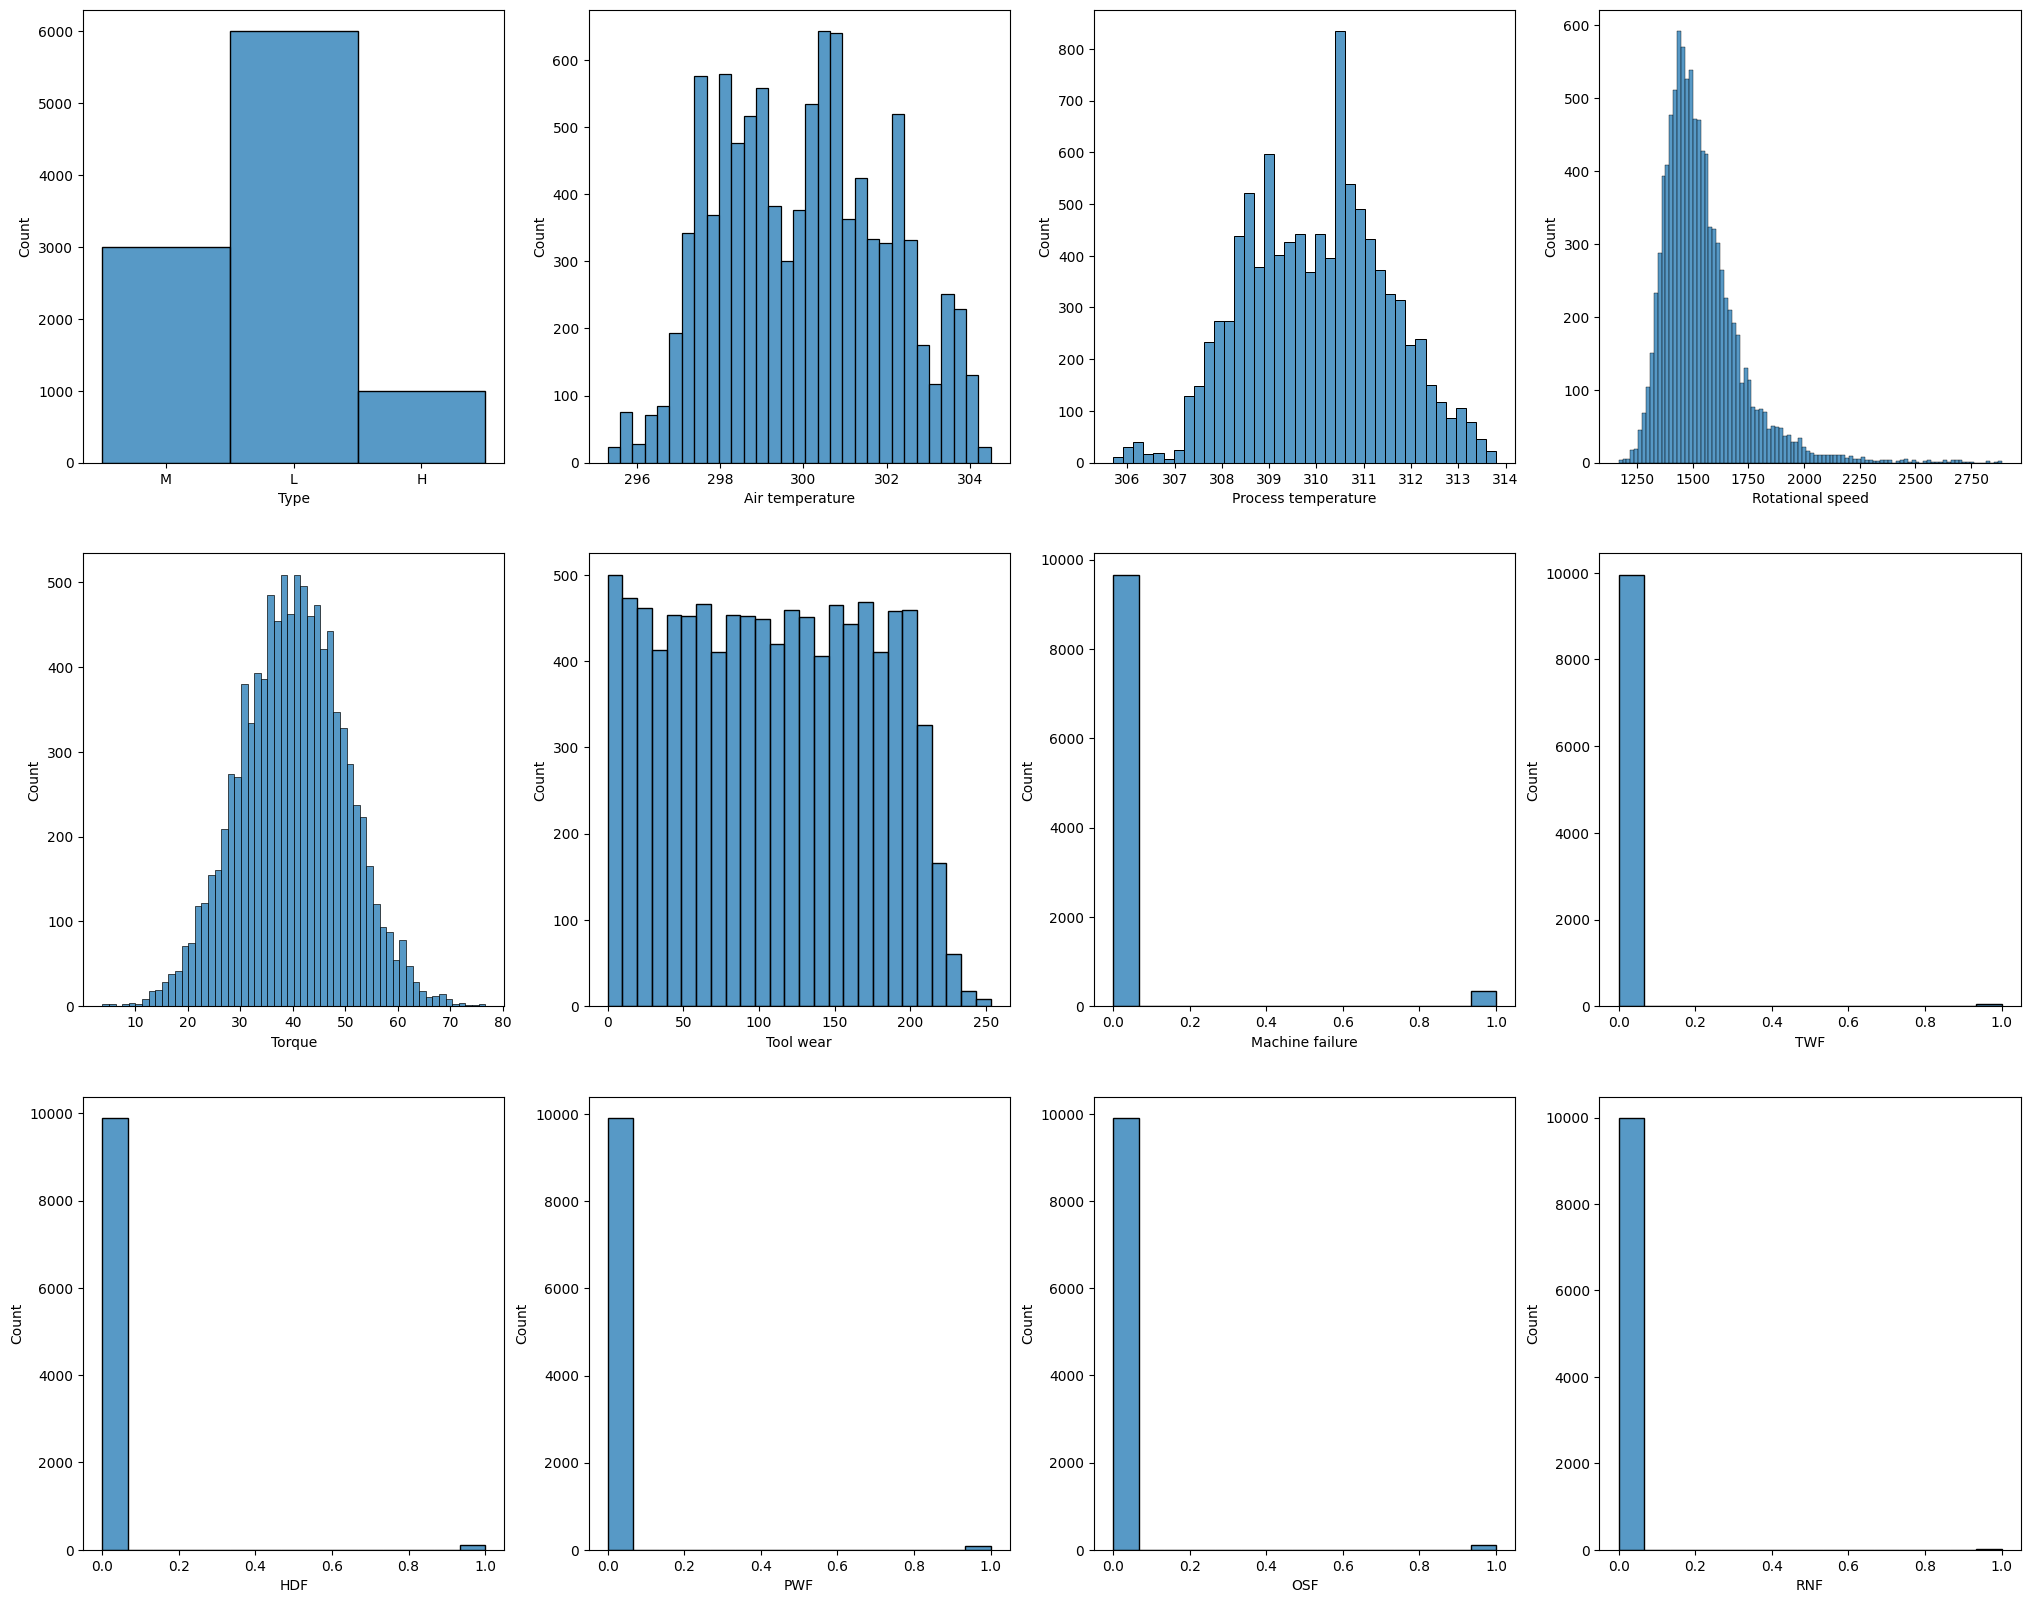

In [28]:
fig,ax = plt.subplots(3,4,figsize =(25,20))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax = ax[i//4][i%4])

#i//4 - rown no
#i %4 - col no

Text(0.5, 1.0, 'Number of failure types per record')

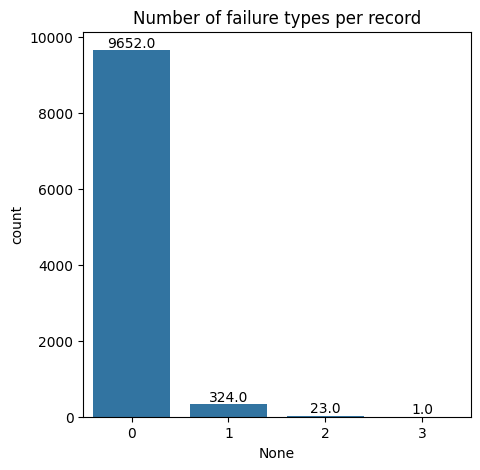

In [29]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

#FIND MEANING OF THESE


In [30]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [31]:
df.dtypes

Type                    object
Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
Machine failure          int64
dtype: object

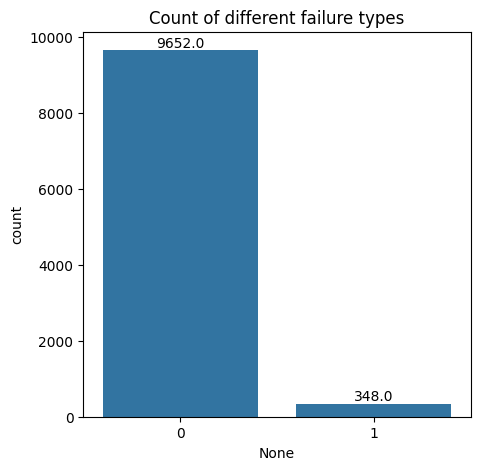

In [32]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')
#FIND MEANING OF THESE

WE CAN DERIVE A NEW ATTRIBUTE AS 


 Power  = Torque * rotational speed 

In [33]:
df['Power'] = df['Torque'] * df['Rotational speed']

<Axes: xlabel='Power', ylabel='Count'>

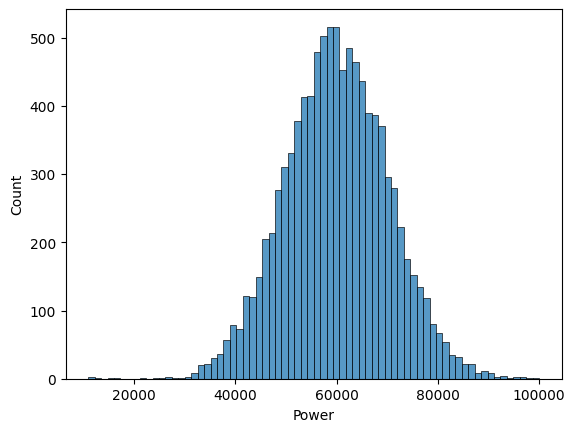

In [34]:
sns.histplot(df['Power'])

## **Data type conversion**

In [35]:
df['Type'].replace('L',0,inplace = True)
df['Type'].replace('M',1,inplace = True)
df['Type'].replace('H',2,inplace = True)

C:\Users\Durgesh\AppData\Local\Temp\ipykernel_7128\1897377803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].replace('L',0,inplace = True)
C:\Users\Durgesh\AppData\Local\Temp\ipykernel_7128\1897377803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [36]:
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)

In [37]:
# view columns data types
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

In [38]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

In [39]:
# Calculate and handle the outliers for each attribute using IQR and Winsorization 
for col in df.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] <= (Q1 - 1.5 * IQR)) | (df[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          df.drop(outliers.index, inplace=True)
df.shape

(9520, 8)

In [40]:
!pip install scikit-learn

In [41]:
# Density-Based Anomaly Detection (LOF) to remove outlier
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df)

# identify the outlier rows (those with a negative score) and remove them
outliers = df[scores == -1]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)
df.shape

(9400, 8)

##  Z- score Transformation

## z = (x-u)/s

In [42]:
!pip install scipy


In [43]:
from scipy.stats import zscore
for col in df.columns:
    if col not in excluded_columns:
        df[col] = zscore(df[col])

## **More visualizations** 

In [44]:
# Box and Whisker Plots for each attribute compared with Machine failure (target)

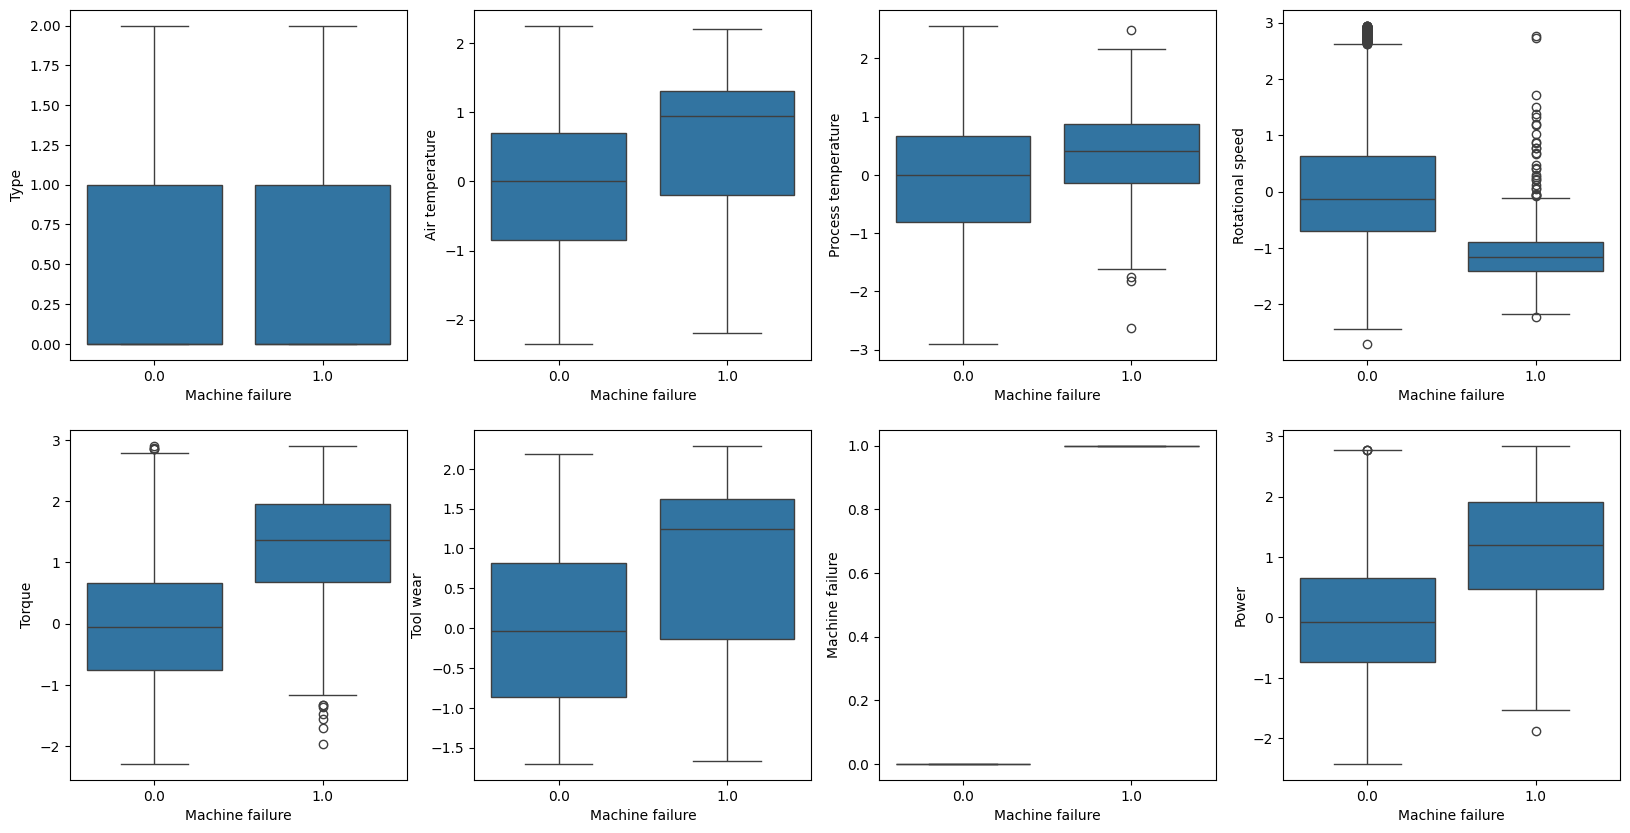

In [45]:
fig,ax = plt.subplots(2,4,figsize = (20,10))
for i , col in enumerate(df.columns):
    sns.boxplot(x = "Machine failure",y = col,data = df,ax = ax[i//4][i%4])

<Axes: title={'center': 'Box and Whisker Plots'}, ylabel='Value'>

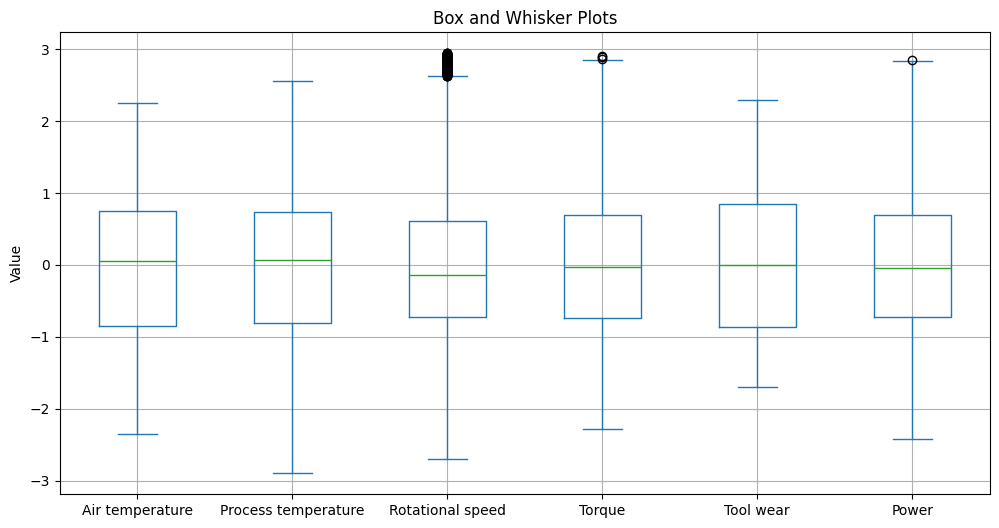

In [46]:
# Box and Whisker Plots for each attribute
plot_columns = [col for col in df.columns if col not in excluded_columns]
df[plot_columns].plot(kind='box', figsize=(12, 6), title='Box and Whisker Plots', ylabel='Value', grid=True)

<Axes: >

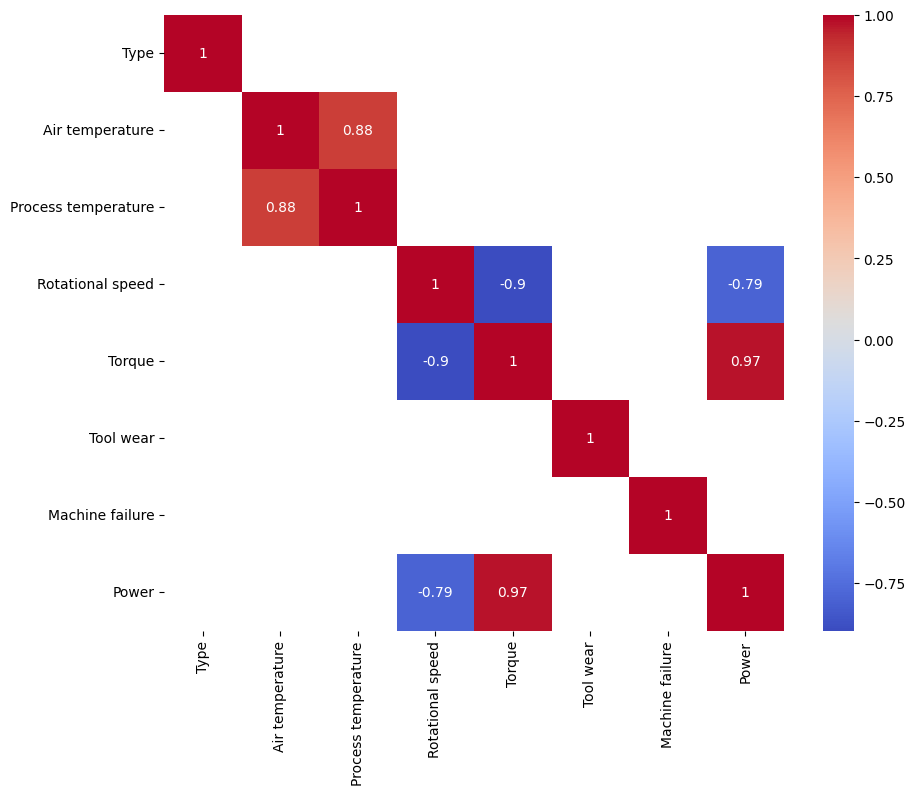

In [47]:
# Finding the correlation between the attributes with threshold = 0.3
threshold = 0.3
correlation = df.corr()
matrix = correlation.where(abs(correlation) >= threshold).isna()
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),cmap="coolwarm", annot=True, mask=matrix)

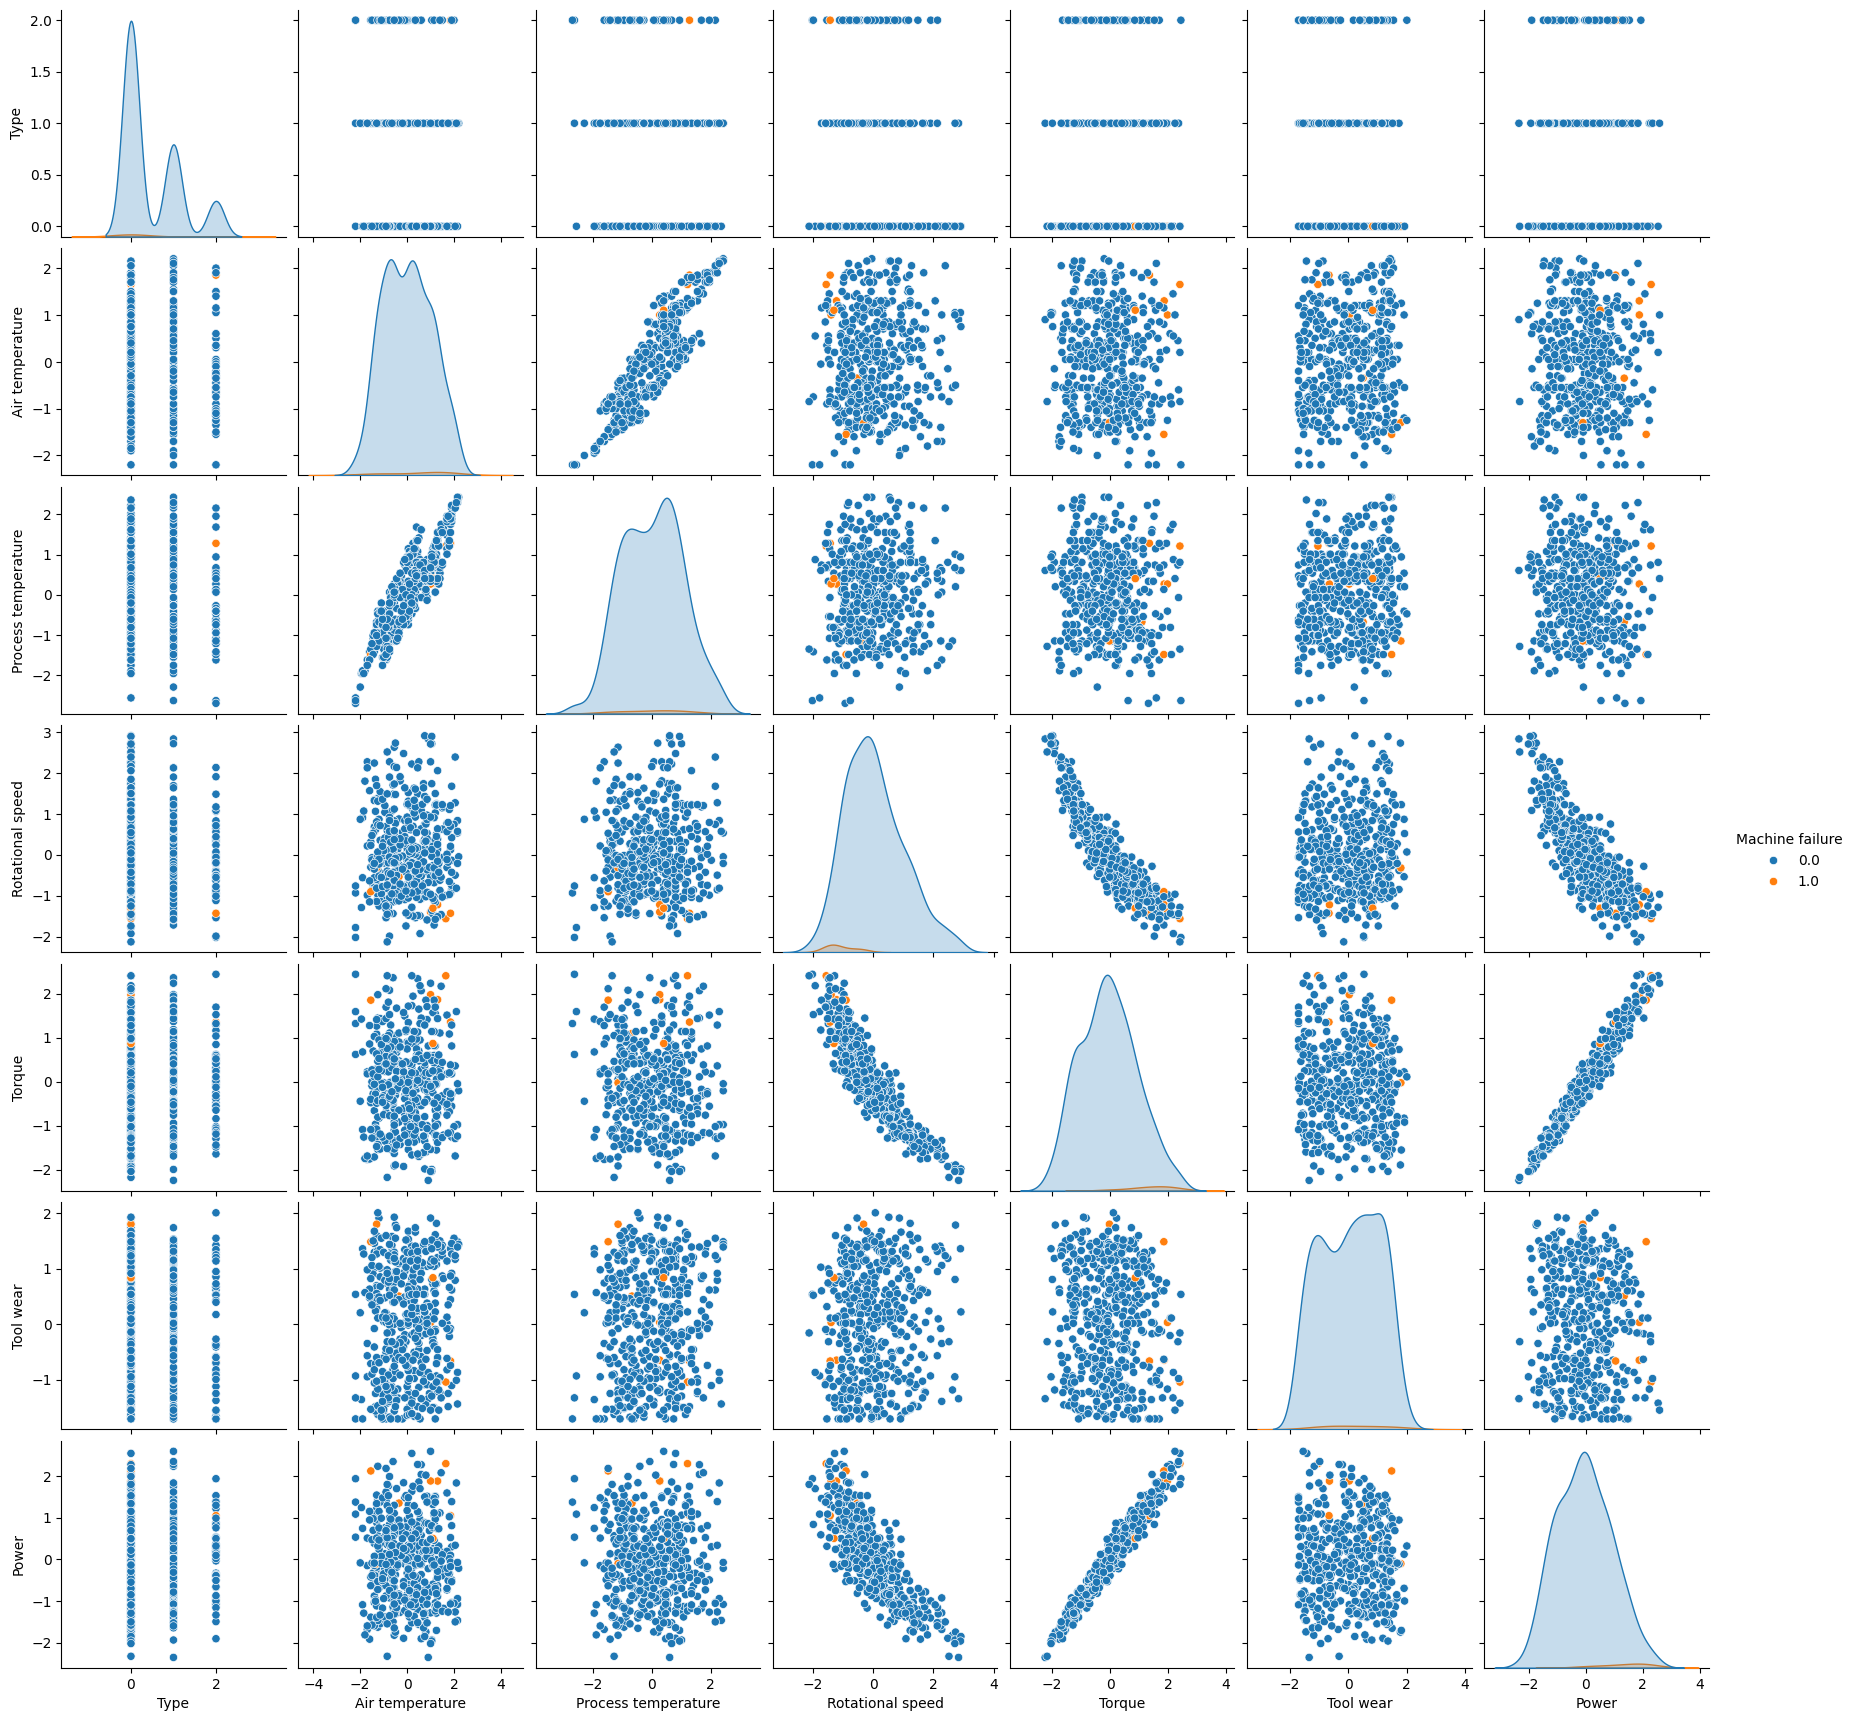

In [48]:
# A scatter plot matrix to display the relationships between attributes in the dataset
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')


<Axes: >

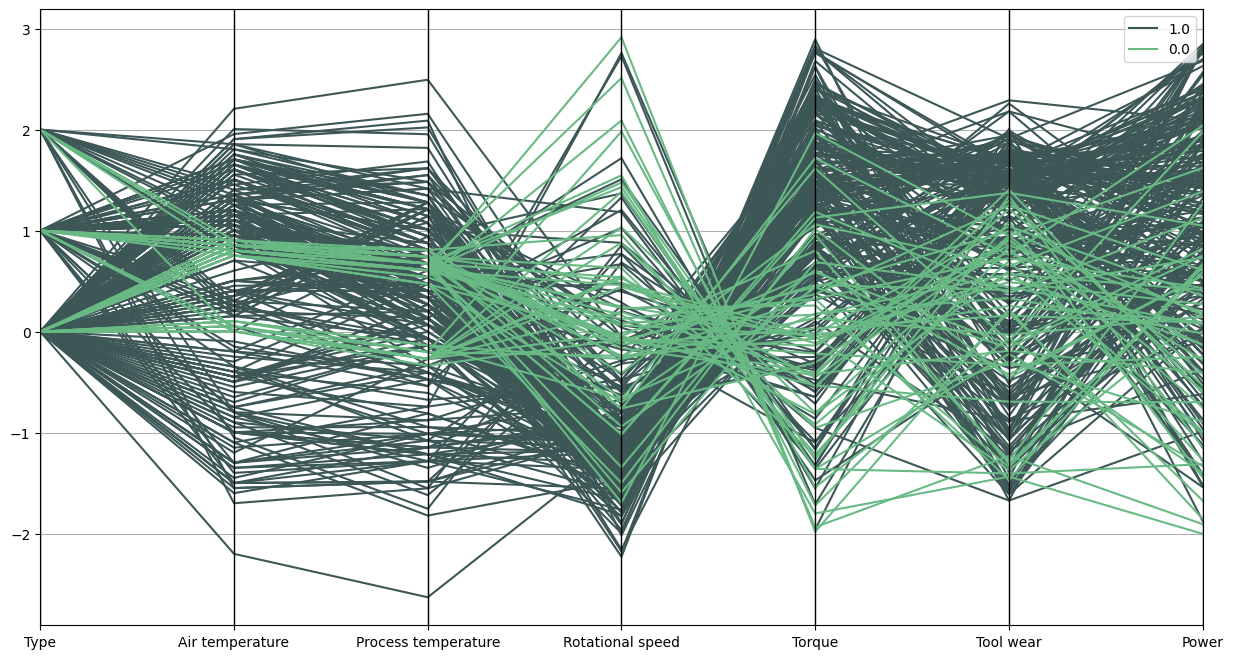

In [49]:
# Parallel coordinate plot (multi-dimensional view)
sample = df.sort_values(by=['Machine failure'], ascending=False).head(300)

plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(sample, 'Machine failure', color=('#3D5656', '#68B984', '#FED049'))

In [50]:
# Generate a profile report that includes (outliers, missing values, distributions, etc.) 
# using [pandas-profiling](https://pandas-profiling.ydata.ai/docs/master/index.html)
# use ydata_profiling
!pip install -U ydata-profiling



  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.10.0
    Uninstalling ydata-profiling-4.10.0:
      Successfully uninstalled ydata-profiling-4.10.0


In [51]:
!pip install --upgrade setuptools


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 74.1.2
    Uninstalling setuptools-74.1.2:
      Successfully uninstalled setuptools-74.1.2


In [52]:
!pip install --upgrade jupyter ipywidgets


In [53]:
df.to_csv("cleaned_dataset.csv", index=False)  

In [56]:
from ydata_profiling import ProfileReport

# Create the profile report
df_profile = ProfileReport(df)

# Display the profile report
df_profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]